# Introduction to Decision Trees (DT)

In [1]:
import sys
sys.path.append('../my_module')

from sofamethods import bit_error_rate, symbol_error_rate, generate_mesh

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_blobs

## Input data preparation

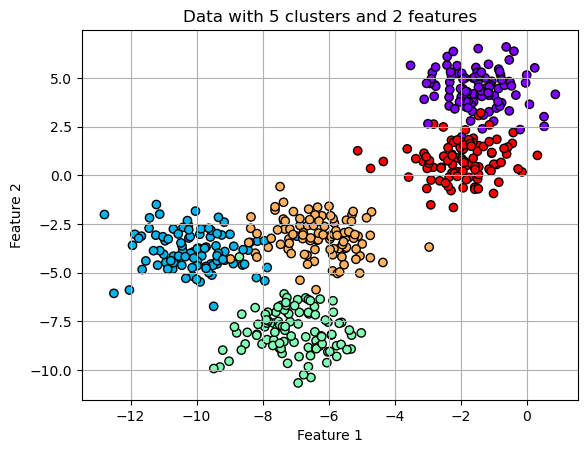

In [2]:
X, y = make_blobs(n_samples=500, centers=5, random_state=1, cluster_std=1.0)

plt.title("Data with 5 clusters and 2 features")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolors='black')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

## DT implementation

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f%%" % (grid.best_params_, grid.best_score_ * 100))

The best parameters are {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3} with a score of 94.75%


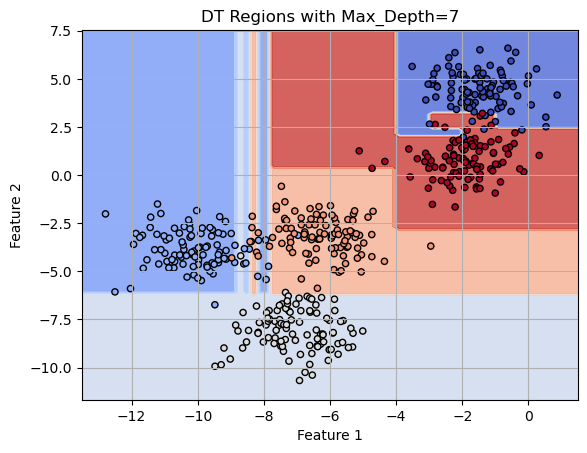

In [4]:
model = DecisionTreeClassifier(**grid.best_params_).fit(X_train, y_train)
xx, yy, Z = generate_mesh(X_train, model, alpha=0.2)

plt.title("DT Regions with Max_Depth=%s" % (grid.best_params_['max_depth']))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

## Test Data Prediction

In [5]:
y_pred = model.predict(X_test)

print("Bit Error Rate: %.2f" % (bit_error_rate(y_test, y_pred)))
print("Symbol Error Rate: %.2f" % (symbol_error_rate(y_test, y_pred)))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

Bit Error Rate: 0.03
Symbol Error Rate: 0.09
Accuracy: 91.00%
